# Web Scraping Supermarkets Analysis (Group Work)
---

In [1]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The first step is to merge the three different CSV files provided by each group member.

In [2]:
# Extract columns of interest for each csv
columns_interest = [
    'ID', 'Competitor', 'Category', 'Product_Description', 'Brand', 
    'Regular_Price (CHF)', 'Grammage', 'Unit', 'Link', 'Scraping_Date', 
    'Discount', 'Actual_Price (CHF)', 'Regular_Price/Unit', 'Actual_Price/Unit']

# Load each CSV file
df1 = pd.read_csv('Final_Scraping_Merged_Pasta.csv', usecols = columns_interest, encoding='utf-8') # Catalina Roth DF
df2 = pd.read_csv('pasta_sauces_merged.csv', usecols = columns_interest, encoding='utf-8') # Martina Diaz DF
df3 = pd.read_csv('RiceData_Cleaned_Transformed_GroupProject.csv', usecols = columns_interest, encoding='utf-8') #Fatima Barcina DF

# Concatenate the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

# Transform 'lidl' name into 'Lidl'
df['Competitor'] = df['Competitor'].str.replace('lidl', 'Lidl', case=False)

# Visualize Dtype
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   297 non-null    int64  
 1   Competitor           297 non-null    object 
 2   Category             297 non-null    object 
 3   Product_Description  297 non-null    object 
 4   Brand                297 non-null    object 
 5   Regular_Price (CHF)  297 non-null    float64
 6   Grammage             297 non-null    float64
 7   Unit                 297 non-null    object 
 8   Link                 297 non-null    object 
 9   Scraping_Date        297 non-null    object 
 10  Discount             297 non-null    object 
 11  Actual_Price (CHF)   297 non-null    float64
 12  Regular_Price/Unit   297 non-null    float64
 13  Actual_Price/Unit    297 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 32.6+ KB


,ID,Competitor,Category,Product_Description,Brand,Regular_Price (CHF),Grammage,Unit,Link,Scraping_Date,Discount,Actual_Price (CHF),Regular_Price/Unit,Actual_Price/Unit
0,1,Migros,Pasta,Agnesi lasagne with eggs,Agnesi,3.95,0.50,kg,https://www.migros.ch/en/product/104066400000,19/10/2024,no discount,3.95,7.9,7.9
1,2,Migros,Pasta,M-Classic tortellini with raw ham,M-Classic,2.50,0.25,kg,https://www.migros.ch/en/product/104075000000,19/10/2024,12%,2.20,10.0,8.8
2,3,Migros,Pasta,M-Classic älplermagronen with eggs,M-Classic,1.90,0.50,kg,https://www.migros.ch/en/product/104074500000,19/10/2024,16%,1.60,3.8,3.2
3,4,Migros,Pasta,Garofalo orecchiette,Garofalo,2.95,0.50,kg,https://www.migros.ch/en/product/104126400000,19/10/2024,no discount,2.95,5.9,5.9
4,5,Migros,Pasta,Garofalo rigatoni,Garofalo,2.95,0.50,kg,https://www.migros.ch/en/product/104125200000,19/10/2024,no discount,2.95,5.9,5.9


## Exploratory Data Analysis

### 1) Summary Statistics

In [3]:
def summary_statistics(df):
    
    # Select only numeric columns for summary statistics
    cols = df.select_dtypes(include='number')
    
    # Calculate statistics
    stats = pd.DataFrame({
        'Mean': round(cols.mean(), 2),
        'Median': round(cols.median(), 2),
        'Mode': round(cols.mode().iloc[0], 2),
        'Min': round(cols.min(), 2),
        'Max': round(cols.max(), 2)
    })
    
    return stats

# Call the function and display the summary statistics
summary_stats = summary_statistics(df)
print(summary_stats)

                      Mean  Median  Mode   Min     Max
ID                   50.81   47.00  1.00  0.00  136.00
Regular_Price (CHF)   3.14    2.99  2.95  0.39   10.90
Grammage              0.50    0.50  0.50  0.02    4.40
Actual_Price (CHF)    3.10    2.95  2.95  0.39   10.90
Regular_Price/Unit   10.06    7.00  5.90  1.19   86.36
Actual_Price/Unit     9.96    6.90  5.90  1.19   86.36


### 2) Boxplots

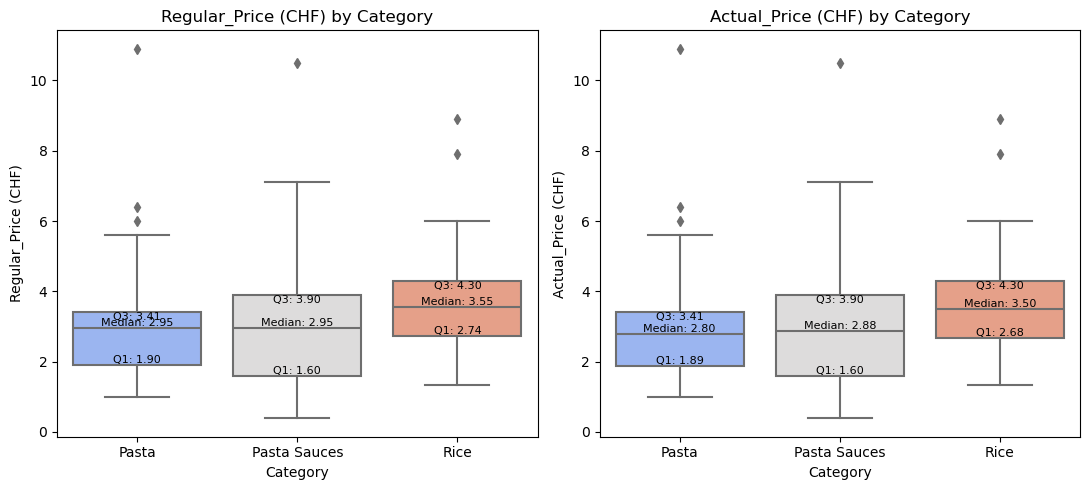

In [4]:
# Define your variables to avoid conflict with the built-in 'vars'
variables = ['Regular_Price (CHF)', 'Actual_Price (CHF)']  # Adjust to your actual column names

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5))  # boxplot size

# Plot a boxplot for each variable, grouped by category
for i, var in enumerate(variables):
    sns.boxplot(data=df, x='Category', y=var, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{var} by Category')
    axes[i].set_ylabel(var)
    
    # Calculate median and IQR
    for category in df['Category'].unique():
        category_data = df[df['Category'] == category][var].dropna()
        median = category_data.median()
        q1 = category_data.quantile(0.25)
        q3 = category_data.quantile(0.75)
        
        # Get position for annotation
        pos = df['Category'].unique().tolist().index(category)
        
        # Annotate median and IQR
        axes[i].text(pos, median, f'Median: {median:.2f}', ha='center', va='bottom', fontsize=8, color='black')
        axes[i].text(pos, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', fontsize=8, color='black')
        axes[i].text(pos, q3, f'Q3: {q3:.2f}', ha='center', va='top', fontsize=8, color='black')
    
# Prevent Overlap
plt.tight_layout()

# Add Title
# plt.suptitle('Boxplots for Prices per Category', fontsize=14, y=1.05)

# Display plot
plt.show()


## Results

### 1) Plot for the Gap Price between Private Label and Third Brand

A Column named " Private Label Product" is created in order to compare its price with third brands.

In [5]:
# Defining Private Labels for Lidl and Migros
private_label_migros = ["M-Classic",
    "Migros Bio",
    "Aha!",
    "SÉlection",
    "M-Budget",
    "V-Love",
    "Aus der Region"]

private_label_lidl = ["Combino",
    "Italiamo",
    "Golden Sun",
    "Baresa",
    "Kania",
    "Freshona",
    "Vemondo",
    "Deluxe"]

# Function to create private label flag
def private_label(df):
    df['Private_Label_Product'] = df['Brand'].apply(lambda x: 'Yes' if x in private_label_migros or x in private_label_lidl else 'No')
    return df['Private_Label_Product']

# Calling the Function private_label
df_private_label = df.copy()
df_private_label['Private_Label_Product'] = private_label(df_private_label)

# Save to CSV
#df1 = df_private_label.to_csv(f"~/Desktop/Private_Label.csv", index = False)


### 2) Table to count the amount of Private Labels and Thir Brands products

In [6]:
# Group by Competitor, Category, and Private_Label_Product to count the occurrences
private_label_counts = df_private_label.groupby(['Competitor', 'Category', 'Private_Label_Product']).size().reset_index(name='Count') # Add Count Column

# Pivot the table to make 'Yes' and 'No' counts as separate columns
pivot_table = private_label_counts.pivot_table(index=['Competitor', 'Category'], columns='Private_Label_Product', values='Count', fill_value=0)

# Rename columns for clarity
pivot_table.columns = ['Count Third Brands', 'Count Private Labels']
pivot_table = pivot_table.reset_index()  # Convert 'Competitor' and 'Category' from index levels into regular columns.

# Sort by Competitor and Category alphabetically
pivot_table = pivot_table.sort_values(by=['Competitor', 'Category']).reset_index(drop=True)

print(pivot_table)


  Competitor      Category  Count Third Brands  Count Private Labels
0       Lidl         Pasta                 6.0                  21.0
1       Lidl  Pasta Sauces                 5.0                  23.0
2       Lidl          Rice                 3.0                   7.0
3     Migros         Pasta                60.0                  21.0
4     Migros  Pasta Sauces                75.0                  10.0
5     Migros          Rice                50.0                  16.0


### 3) Plot for the Average Price_Unit of Third Brands vs Private Labels per competitor and category

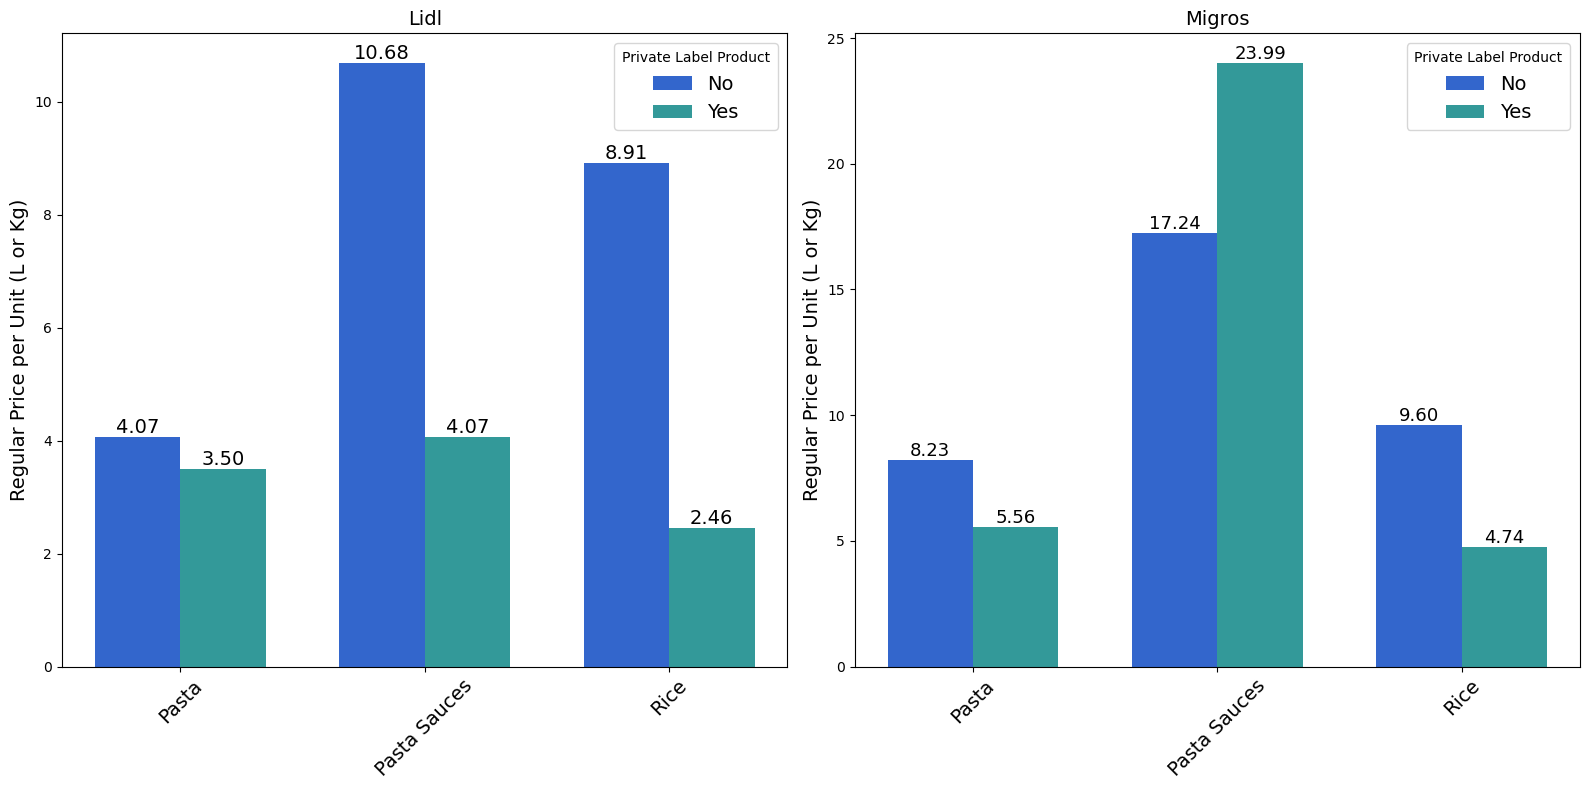

In [63]:
# Filter data for Lidl and Migros
lidl_data = df_private_label[df_private_label['Competitor'] == 'Lidl']
migros_data = df_private_label[df_private_label['Competitor'] == 'Migros']

# Group by Category and Private_Label_Product to calculate the mean of Regular_Price/Unit
average_regular_price_lidl = lidl_data.groupby(['Category', 'Private_Label_Product'])['Regular_Price/Unit'].mean().reset_index()
average_regular_price_migros = migros_data.groupby(['Category', 'Private_Label_Product'])['Regular_Price/Unit'].mean().reset_index()

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Set the bar width
bar_width = 0.35
categories = average_regular_price_lidl['Category'].unique()
private_labels = average_regular_price_lidl['Private_Label_Product'].unique()
x = range(len(categories))

# Define colors for each competitor
lidl_colors = ['#3366cc', '#339999']  
migros_colors = ['#3366cc', '#339999']

# Plot for Lidl
for i, private_label in enumerate(private_labels):
    subset = average_regular_price_lidl[average_regular_price_lidl['Private_Label_Product'] == private_label]
    bars = ax1.bar(
        [pos + i * bar_width for pos in x],
        subset['Regular_Price/Unit'],
        width=bar_width,
        color=migros_colors[i % len(migros_colors)],
        label=private_label
    )
    # Add average price labels  with 3 decimals
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize = 14)

ax1.set_title('Lidl', fontsize = 14)
ax1.set_ylabel('Regular Price per Unit (L or Kg)', fontsize = 14)
ax1.set_xticks([pos + bar_width / 2 for pos in x])
ax1.set_xticklabels(categories, rotation=45, fontsize = 14)
ax1.legend(title='Private Label Product', fontsize = 14)

# Plot for Migros
for i, private_label in enumerate(private_labels):
    subset = average_regular_price_migros[average_regular_price_migros['Private_Label_Product'] == private_label]
    bars = ax2.bar(
        [pos + i * bar_width for pos in x],
        subset['Regular_Price/Unit'],
        width=bar_width,
        color=migros_colors[i % len(migros_colors)],
        label=private_label
    )
    # Add average price with 2 decimals
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize = 13)

ax2.set_title('Migros', fontsize = 14)
ax2.set_ylabel('Regular Price per Unit (L or Kg)', fontsize = 14)
ax2.set_xticks([pos + bar_width / 2 for pos in x])
ax2.set_xticklabels(categories, rotation=45, fontsize = 14)
ax2.legend(title='Private Label Product', fontsize = 14)

plt.tight_layout()
plt.show()


### 4) Table to obtain saving between each type of brands

In [71]:
# Group by Competitor, Category, and Private_Label_Product to calculate the average Regular_Price/Unit
average_price = df_private_label.groupby(['Competitor', 'Category', 'Private_Label_Product'])['Regular_Price/Unit'].mean().reset_index()

# Pivot the table to make 'Yes' and 'No' averages as separate columns
pivot_avg_price = average_price.pivot_table(
    index=['Competitor', 'Category'],
    columns='Private_Label_Product',
    values='Regular_Price/Unit',
    fill_value=0
)

# Rename columns for clarity
pivot_avg_price.columns = ['Avg Price Regular/Unit Third Brands', 'Avg Price Regular/Unit Private Labels']

# Reset the index to turn Competitor and Category from index levels into regular columns
pivot_avg_price = pivot_avg_price.reset_index()

# Group by Competitor, Category, and Private_Label_Product to count occurrences
private_label_counts = df_private_label.groupby(['Competitor', 'Category', 'Private_Label_Product']).size().reset_index(name='Count')

# Pivot the table to make 'Yes' and 'No' counts as separate columns
pivot_counts = private_label_counts.pivot_table(
    index=['Competitor', 'Category'],
    columns='Private_Label_Product',
    values='Count')

# Rename count columns for clarity
pivot_counts.columns = ['Count Third Brands', 'Count Private Labels']
pivot_counts = pivot_counts.reset_index()

# Merge counts and average prices
pivot_table = pivot_counts.merge(pivot_avg_price, on=['Competitor', 'Category'], how='left')

# Format the counts as integers and prices with one decimal place
pivot_table['Count Third Brands'] = pivot_table['Count Third Brands'].astype(int)
pivot_table['Count Private Labels'] = pivot_table['Count Private Labels'].astype(int)
pivot_table['Avg Price Regular/Unit Third Brands'] = pivot_table['Avg Price Regular/Unit Third Brands'].round(1)
pivot_table['Avg Price Regular/Unit Private Labels'] = pivot_table['Avg Price Regular/Unit Private Labels'].round(1)

# Calculate Percentage of Saving
pivot_table['Percentage of Saving'] = (
    (pivot_table['Avg Price Regular/Unit Private Labels'] - pivot_table['Avg Price Regular/Unit Third Brands'])
    / pivot_table['Avg Price Regular/Unit Third Brands'] * 100
).round(1)

# Sort by Competitor and Category alphabetically
pivot_table = pivot_table.sort_values(by=['Competitor', 'Category']).reset_index(drop=True)

print(pivot_table)

  Competitor      Category  Count Third Brands  Count Private Labels  \
0       Lidl         Pasta                   6                    21   
1       Lidl  Pasta Sauces                   5                    23   
2       Lidl          Rice                   3                     7   
3     Migros         Pasta                  60                    21   
4     Migros  Pasta Sauces                  75                    10   
5     Migros          Rice                  50                    16   

   Avg Price Regular/Unit Third Brands  Avg Price Regular/Unit Private Labels  \
0                                  4.1                                    3.5   
1                                 10.7                                    4.1   
2                                  8.9                                    2.5   
3                                  8.2                                    5.6   
4                                 17.2                                   24.0   
5        